# Домашнее задание №2

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

## Часть 1 - Деревья решений (30%)

### 1.1. Самостоятельное написание дерева решений  (10%)
Источник: [mlcourse.ai](https://mlcourse.ai) от [Юрия Кашницкого](https://yorko.github.io) и [OpenDataScience](https://ods.ai)

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, нужно построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. 

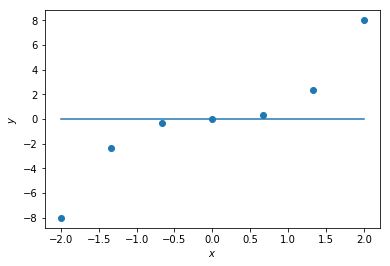

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.plot(np.linspace(-2,2,50), np.linspace(np.mean(y),np.mean(y),50))
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график.

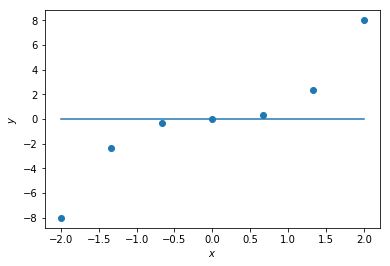

In [3]:
# Ваш Код здесь
plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.plot(np.linspace(-2,2,50), np.linspace(np.mean(y),np.mean(y),50))
plt.ylabel(r'$y$');

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

In [17]:
# Ваш Код здесь

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий: $$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$ где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[xj < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$: $$D(X) = \dfrac{1}{|X|} \sum{x_j \in X}(yj – \dfrac{1}{|X|}\sum{x_i \in X}y_i)^2,$$ где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине).

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [16]:
# Ваш Код здесь

### 1.2. Применение дерева решений на реальных данных (20%)

Для работы возьмем данные из соревания [Employee Access Challenge](https://www.kaggle.com/c/amazon-employee-access-challenge/), проводимое Amazon.com.  
Скачайте данные и прочитайте подробное описание задачи и признаков на странице конкурса.

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
X = train.drop('ACTION', axis=1)
y = train['ACTION'].values

Разделим выборку на обучающую (80%) и тестовую (20%) - обязательно укажите параметр `random_state=42`

In [ ]:
x_train, x_val, y_train, y_val = # Ваш Код здесь

Обучите решающее дерево с параметрами по умолчанию и проверьте качество на отложенной выборке. в качестве метрики будем испольовать ROC AUC.  
Единственный параметр который мы будем использовать - random_state=42. 

In [ ]:
# Ваш Код здесь

Посмотрите какие параметре есть у дерева и прочтите в документации о каждом из них. 
Один из параметров - критерий разбиения он может принимать значения 'gini' или 'entropy'
Другой важный параметр: глубина дерева. 

Вашим заданием, будет построить графики зависимости ROC AUC в зависимости от критерия разбиения и глубины дерева. 
Давайте договоримся, что смотреть будем глубину начиная с 1 и заканчивая 40 (включая обе границы)
Не забудьте установить random_state=42 

In [ ]:
# Ваш Код здесь

Дерево с какими параметрами, дало наилучший результат? Какие это параметры? Обучите его. 

In [ ]:
# Ваш Код здесь

## Часть 2 - Случайный лес (20%)

### 2.1. Bagging (10%)
Обучите BaggingClassifier с параметрами по умолчанию (random_state=42)  
В качестве базового алгоритма, используйте дерево с лучшими параметрами из предыдущего задания.


In [ ]:
# Ваш Код здесь

Подберите, любым известным Вам способом, оптимальное количество базовых алгоритмов.

In [ ]:
# Ваш Код здесь

### 2.2. RandomForest (10%)

Обучите RandomForestClassifier. В качестве параметров используйте лучшие из предыдущих заданий. (random_state=42)

In [ ]:
# Ваш Код здесь

Удалось ли Вам добиться лучшего качества, чем BaggingClassifier? Объясните, почему это происходит?

## Часть 3 - Градиентный бустинг (40%)
Сегодня мы познакомимся с еще одной библиотекой градиентного бустинга [Catboost](https://catboost.ai), детищем компании Яндекс. 

In [ ]:
from catboost import CatBoostClassifier

Давайте посмотрим, на что способен наш котик. 

In [ ]:
cat = CatBoostClassifier(eval_metric='AUC')
cat.fit(x_train, y_train, eval_set=(x_val, y_val), plot=True, verbose_eval=False )

In [ ]:
roc_auc_score(y_val,cat.predict_proba(x_val)[:,1])

Итак Ваше задание: Подобрав оптимальные параметры попробуйте достигнуть ROC AUC на отложенной выборке более чем 0.88.   
__Замечание:__ Даже если побить не удается, подробно опишите, что Вы патались делать, какие параметры крутили и чего ожидали.

## Часть 4 - Визуализация (10%)
Мы обучили несколько классификаторов:
- Решающее дерево
- Бэггинг 
- Случайный лес
- Бустинг

Нарисуйте на одном графике ROC-кривые (англ. receiver operating characteristic) для каждого алгоритма с лучшими параметрами на тестовой выборке. 

In [ ]:
# Ваш Код здесь